# Arboles de decision

#### Danilo Manquillo - Unad
#### Analisis de datos

Pasos de la Actividad

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4.Dividir el dataset en Train y Test para evaluar correctamente el modelo
5.Entrenar el modelo configurando los diferentes hiperparámetros
6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


### 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
#Importamos Las Librerias
import pandas as pd
import numpy as np
import seaborn as sns #visualizacion graficas
import matplotlib.pyplot as plt #visualizacion
from sklearn import metrics #para realizar 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
#cargar el archivo de datos
datos = pd.read_csv("../3.Arboles_Decision/winequality-red.csv")

In [14]:
datos.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [16]:
datos.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
datos.shape

(1599, 12)

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
#buscando valores nulos
datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

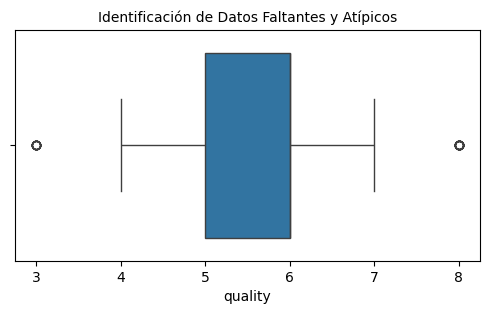

In [28]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos ['quality'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

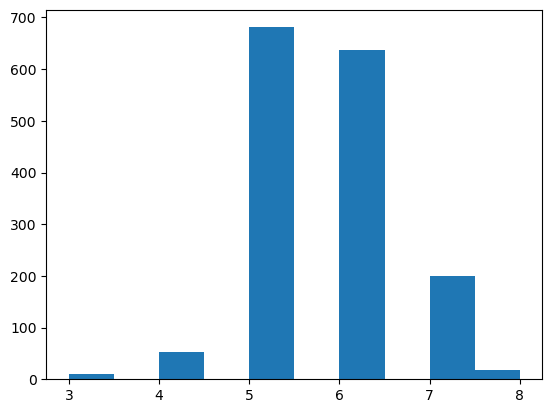

In [32]:
plt.hist(datos.quality)

### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [85]:
predictors_col=["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target_col =["quality"]

In [52]:
predictors = datos[predictors_col]
target = datos[target_col]

In [54]:
predictors

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [56]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [58]:
corr = predictors.corr()
corr

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000


### 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [62]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [64]:

tree = DecisionTreeClassifier()

### 5.Entrenar el modelo configurando los diferentes hiperparámetros

In [66]:
arbol = tree.fit(X_train, y_train)

In [70]:
predicciones = arbol.predict(X_test)

In [72]:
predicciones

array([7, 5, 5, 5, 6, 5, 5, 8, 4, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 7, 5, 6, 7, 5, 5, 6, 7,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 7, 5,
       7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 6, 5, 7, 7, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 6, 7, 4, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 4, 6, 5, 5, 5, 5, 5, 7, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 5, 5, 4, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 4, 7, 7, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 4, 6, 6, 5, 5, 5, 7, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 7,

In [74]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,2,3,2,1,0
5,1,2,104,34,5,0
6,0,4,32,71,15,2
7,0,0,5,11,19,0
8,0,0,2,1,3,0


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [76]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6125

In [78]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6085650830099482

In [80]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6125

In [82]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6098663706112986

### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

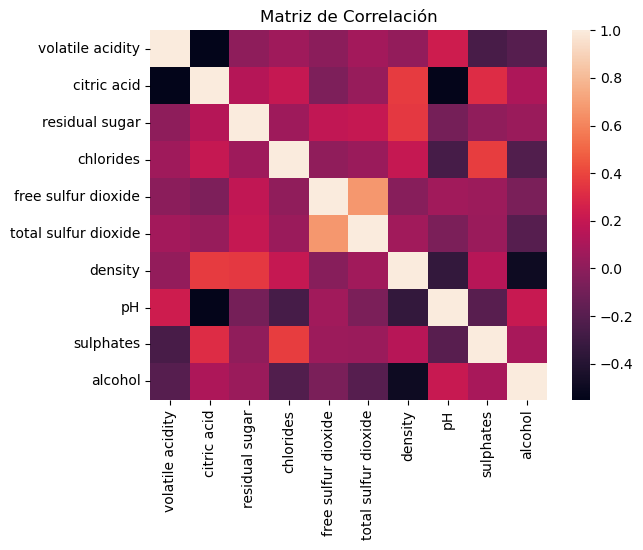

In [93]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

[Text(0.5297562861503856, 0.9772727272727273, 'x[9] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.24916653277634962, 0.9318181818181818, 'x[8] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.3894614094633676, 0.9545454545454546, 'True  '),
 Text(0.04054198800342759, 0.8863636363636364, 'x[0] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.013710368466152529, 0.8409090909090909, 'x[3] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.010282776349614395, 0.7954545454545454, 'x[3] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.006855184233076264, 0.75, 'x[1] <= 0.29\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.003427592116538132, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.010282776349614395, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 

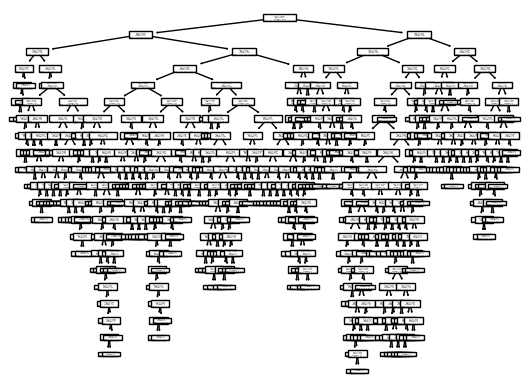

In [99]:
plot_tree(arbol)